### Importação dos dados



In [65]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [66]:
faturamento_loja1 = (loja['Preço'] * loja.get('Quantidade', 1)).sum()
faturamento_loja2 = (loja2['Preço'] * loja2.get('Quantidade', 1)).sum()
faturamento_loja3 = (loja3['Preço'] * loja3.get('Quantidade', 1)).sum()
faturamento_loja4 = (loja4['Preço'] * loja4.get('Quantidade', 1)).sum()

print(f'Faturamento Loja 1: {faturamento_loja1}')
print(f'Faturamento Loja 2: {faturamento_loja2}')
print(f'Faturamento Loja 3: {faturamento_loja3}')
print(f'Faturamento Loja 4: {faturamento_loja4}')


Faturamento Loja 1: 1534509.12
Faturamento Loja 2: 1488459.06
Faturamento Loja 3: 1464025.03
Faturamento Loja 4: 1384497.58


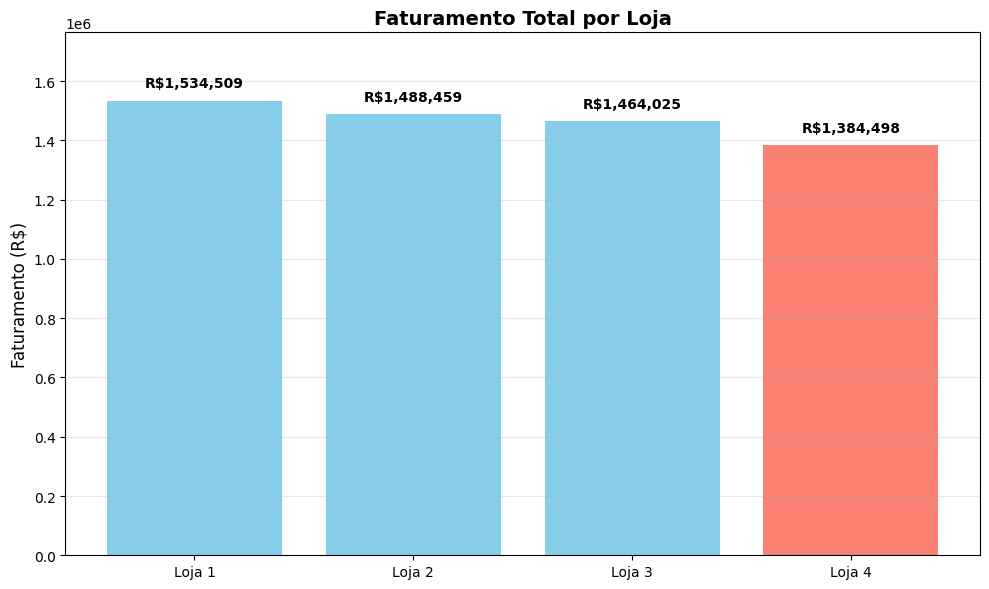

In [67]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Destacar a loja com menor faturamento
cores = ['skyblue' if f != min(faturamentos) else 'salmon' for f in faturamentos]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, faturamentos, color=cores)

plt.title("Faturamento Total por Loja", fontsize=14, fontweight='bold')
plt.ylabel("Faturamento (R$)", fontsize=12)

# Formatação personalizada do eixo Y
def format_currency(x, pos):
    return f'R${x/1000000:.1f}M'



# Ajustar limites do eixo Y
y_max = max(faturamentos) * 1.15  # 15% de margem superior
plt.ylim(0, y_max)


for i, valor in enumerate(faturamentos):
    plt.text(i, valor + (y_max * 0.02), f'R${valor:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



# 2. Vendas por Categoria


In [68]:
faturamento_categoria = loja.groupby('Categoria do Produto')['Preço'].sum()
faturamento_categoria2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
faturamento_categoria3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
faturamento_categoria4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

vendas_categoria1 = loja.groupby('Categoria do Produto')['Produto'].count()
vendas_categoria2 = loja2.groupby('Categoria do Produto')['Produto'].count()
vendas_categoria3 = loja3.groupby('Categoria do Produto')['Produto'].count()
vendas_categoria4 = loja4.groupby('Categoria do Produto')['Produto'].count()


faturamento_lojas = pd.DataFrame({
    'Loja 1': faturamento_categoria,
    'Loja 2': faturamento_categoria2,
    'Loja 3': faturamento_categoria3,
    'Loja 4': faturamento_categoria4
}).fillna(0)

vendas_lojas = pd.DataFrame({
    'Loja 1': vendas_categoria1,
    'Loja 2': vendas_categoria2,
    'Loja 3': vendas_categoria3,
    'Loja 4': vendas_categoria4
}).fillna(0)

print(faturamento_lojas)
print(vendas_lojas)





                          Loja 1     Loja 2     Loja 3     Loja 4
Categoria do Produto                                             
brinquedos              23993.78   21262.21   25869.20   27015.67
eletrodomesticos       484913.36  464758.13  438984.89  377680.65
eletronicos            572659.23  547773.71  547699.92  545966.86
esporte e lazer         52387.55   46326.09   47456.10   44465.65
instrumentos musicais  121731.69  139987.03  103174.45  100136.50
livros                  11713.92   13454.35   12664.70   12427.77
moveis                 250178.11  235234.68  268095.56  256705.65
utilidades domesticas   16931.48   19662.86   20080.21   20098.83
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos mus

<Figure size 1400x800 with 0 Axes>

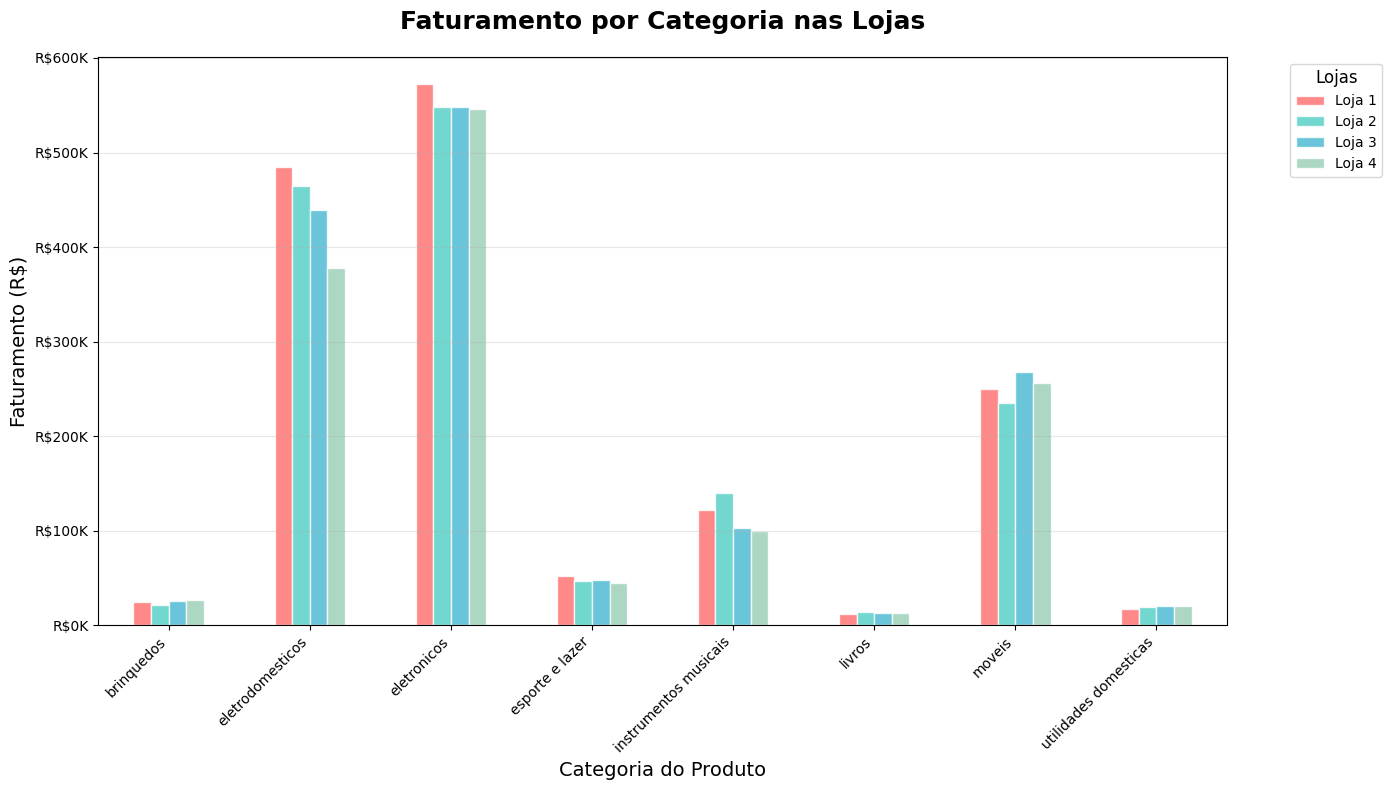

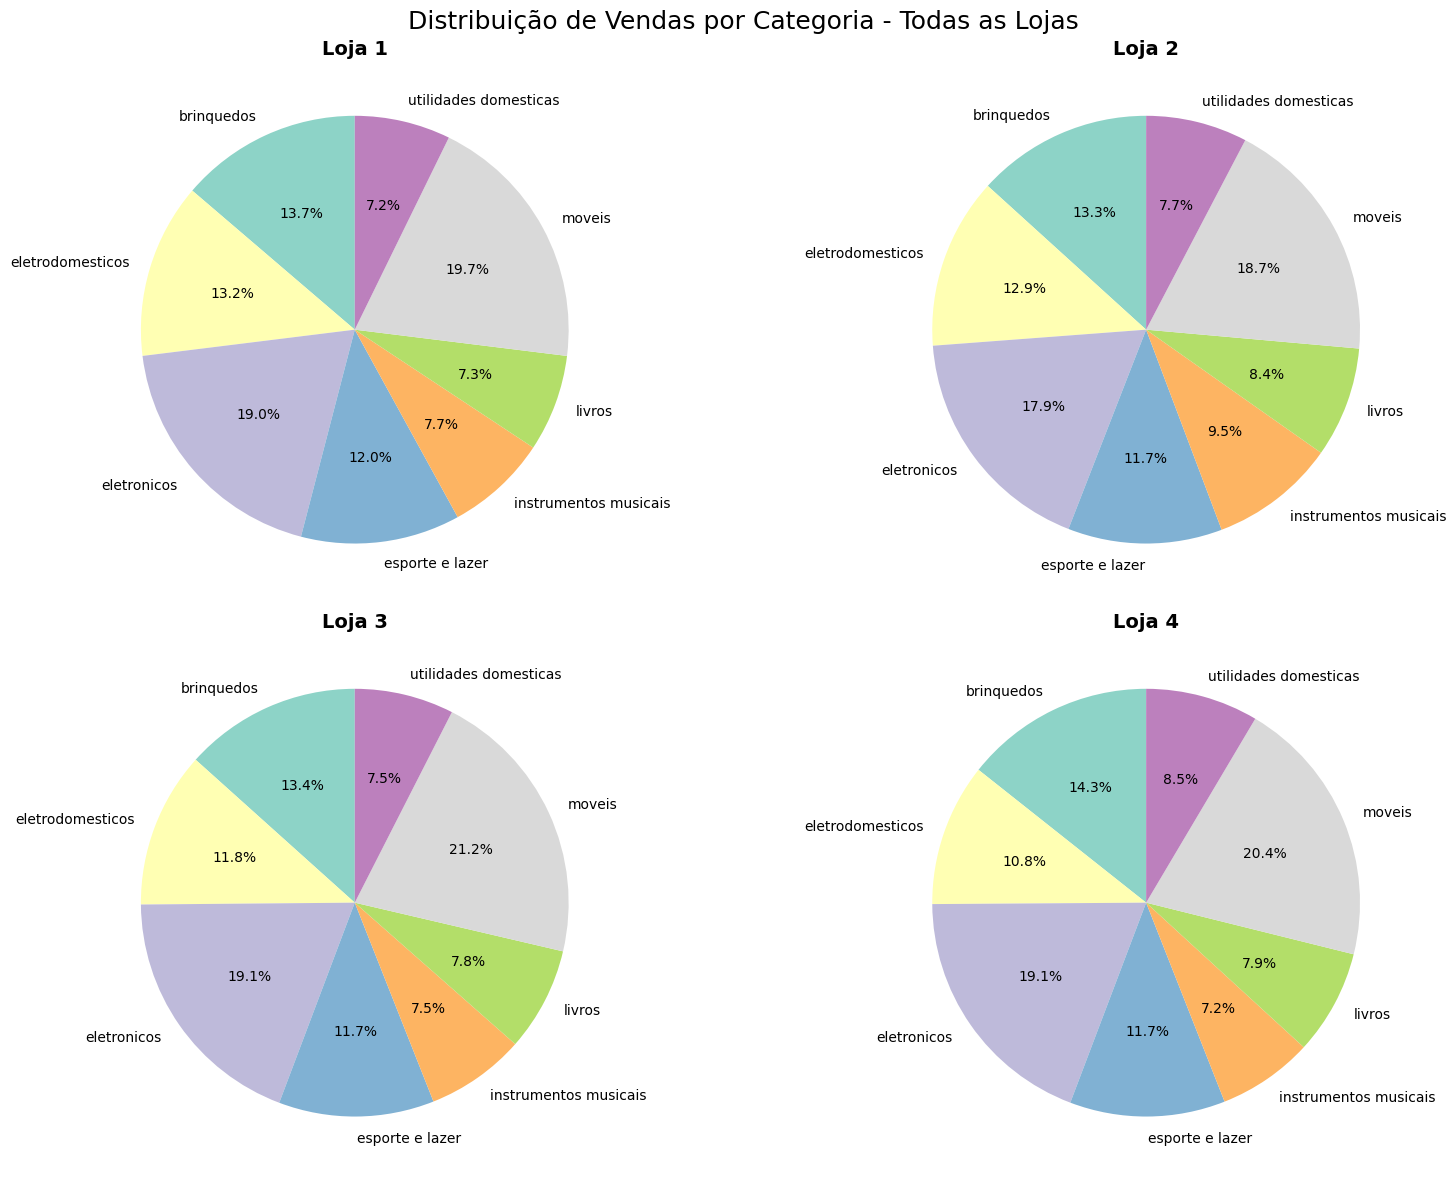

In [69]:
plt.figure(figsize=(14, 8))

ax = faturamento_lojas.plot(kind='bar', figsize=(14, 8),
                           color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                           alpha=0.8, edgecolor='white', linewidth=1)

plt.title("Faturamento por Categoria nas Lojas", fontsize=18, fontweight='bold', pad=20)
plt.ylabel("Faturamento (R$)", fontsize=14)
plt.xlabel("Categoria do Produto", fontsize=14)


plt.xticks(rotation=45, ha='right')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R${x/1000:.0f}K' if x < 1000000 else f'R${x/1000000:.1f}M'))

plt.grid(axis='y', alpha=0.3)

plt.legend(title='Lojas', title_fontsize=12, fontsize=10,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# criar gráficos de pizza para as categorias
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuição de Vendas por Categoria - Todas as Lojas', fontsize=18, y=0.98)

# Lista das lojas e seus dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
dados_lojas = [loja, loja2, loja3, loja4]

colors = plt.cm.Set3(np.linspace(0, 1, 10))

for i, (nome_loja, dados) in enumerate(zip(lojas, dados_lojas)):
    row, col = i // 2, i % 2
    ax = axes[row, col] #calcular a posição do gráfico pela matriz

    # Agrupa dados por categoria
    vendas = dados.groupby('Categoria do Produto')['Produto'].count()

    # Cria gráfico de pizza
    ax.pie(vendas.values, labels=vendas.index, autopct='%1.1f%%',
           colors=colors[:len(vendas)], startangle=90)
    ax.set_title(nome_loja, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [70]:
avaliacao_categoria1 = loja.groupby('Categoria do Produto')['Avaliação da compra'].mean()
avaliacao_categoria2 = loja2.groupby('Categoria do Produto')['Avaliação da compra'].mean()
avaliacao_categoria3 = loja3.groupby('Categoria do Produto')['Avaliação da compra'].mean()
avaliacao_categoria4 = loja4.groupby('Categoria do Produto')['Avaliação da compra'].mean()

avaliacao_lojas = pd.DataFrame({
    'Loja 1': avaliacao_categoria1,
    'Loja 2': avaliacao_categoria2,
    'Loja 3': avaliacao_categoria3,
    'Loja 4': avaliacao_categoria4
}).fillna(0)

print(avaliacao_lojas)

avaliacao_loja1 = loja['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print("Avaliação geral de cada loja:")
print(f"Loja 1: {avaliacao_loja1:.2f}")
print(f"Loja 2: {avaliacao_loja2:.2f}")
print(f"Loja 3: {avaliacao_loja3:.2f}")
print(f"Loja 4: {avaliacao_loja4:.2f}")


                         Loja 1    Loja 2    Loja 3    Loja 4
Categoria do Produto                                         
brinquedos             4.077160  4.025559  4.196825  3.988166
eletrodomesticos       4.032051  4.072131  4.010791  3.929134
eletronicos            4.004464  3.971564  3.986696  4.006652
esporte e lazer        3.897887  4.065455  3.938628  4.054152
instrumentos musicais  4.049451  4.035714  4.005650  3.911765
livros                 3.976879  3.949239  4.048649  4.042781
moveis                 3.946237  4.092760  4.098196  3.997917
utilidades domesticas  3.748538  4.071823  4.073446  4.009950
Avaliação geral de cada loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


/tmp/ipython-input-66576904.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


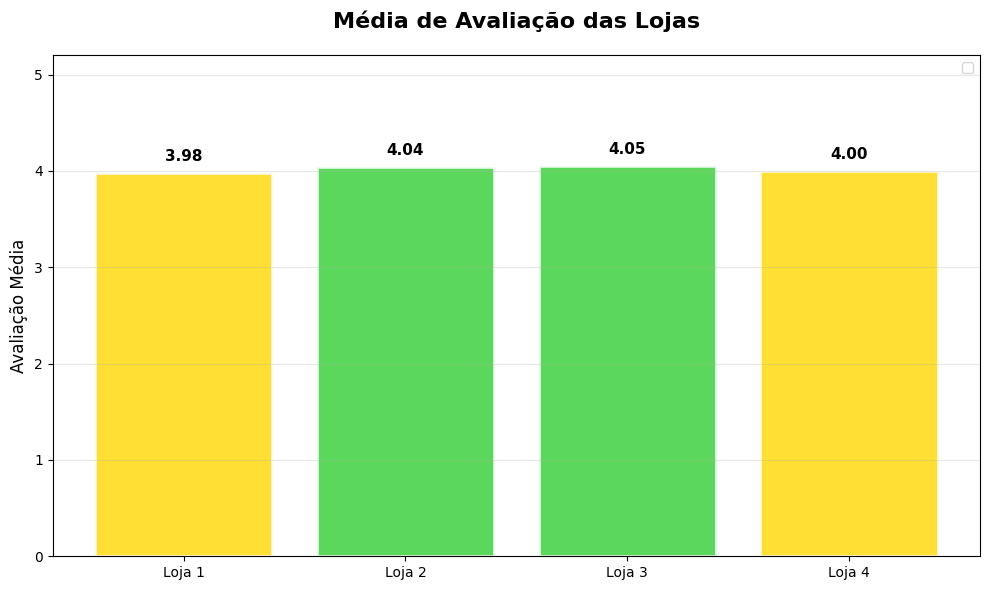

In [71]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]

# Cores baseadas na performance (verde = boa, amarelo = média, vermelho = ruim)
def get_color(rating):
    if rating >= 4.5: return '#2E8B57'  # Verde escuro
    elif rating >= 4.0: return '#32CD32'  # Verde
    elif rating >= 3.5: return '#FFD700'  # Amarelo
    elif rating >= 3.0: return '#FFA500'  # Laranja
    else: return '#DC143C'  # Vermelho

cores = [get_color(av) for av in avaliacoes]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, avaliacoes, color=cores, alpha=0.8, edgecolor='white', linewidth=2)

plt.title("Média de Avaliação das Lojas", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Avaliação Média", fontsize=12)
plt.ylim(0, 5.2)



# Valores nas barras com estrelas
for i, (bar, valor) in enumerate(zip(bars, avaliacoes)):
    plt.text(bar.get_x() + bar.get_width()/2., valor + 0.1,
             f'{valor:.2f}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [72]:
vendas_produtos1 = loja['Produto'].value_counts()
mais_vendidos1 = vendas_produtos1.head(5)  # Top 5 mais vendidos
menos_vendidos1 = vendas_produtos1.tail(5) # Top 5 menos vendidos

vendas_produtos2 = loja2['Produto'].value_counts()
mais_vendidos2 = vendas_produtos2.head(5)
menos_vendidos2 = vendas_produtos2.tail(5)

vendas_produtos3 = loja3['Produto'].value_counts()
mais_vendidos3 = vendas_produtos3.head(5)
menos_vendidos3 = vendas_produtos3.tail(5)

vendas_produtos4 = loja4['Produto'].value_counts()
mais_vendidos4 = vendas_produtos4.head(5)
menos_vendidos4 = vendas_produtos4.tail(5)

print("Loja 1 - Mais Vendidos:\n", mais_vendidos1)
print("Loja 1 - Menos Vendidos:\n", menos_vendidos1)

print("Loja 2 - Mais Vendidos:\n", mais_vendidos2)
print("Loja 2 - Menos Vendidos:\n", menos_vendidos2)

print("Loja 3 - Mais Vendidos:\n", mais_vendidos3)
print("Loja 3 - Menos Vendidos:\n", menos_vendidos3)

print("Loja 4 - Mais Vendidos:\n", mais_vendidos4)
print("Loja 4 - Menos Vendidos:\n", menos_vendidos4)


Loja 1 - Mais Vendidos:
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64
Loja 1 - Menos Vendidos:
 Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64
Loja 2 - Mais Vendidos:
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64
Loja 2 - Menos Vendidos:
 Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64
Loja 3 - Mais Vendidos:
 Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64
Loja 3 - Menos Vendidos

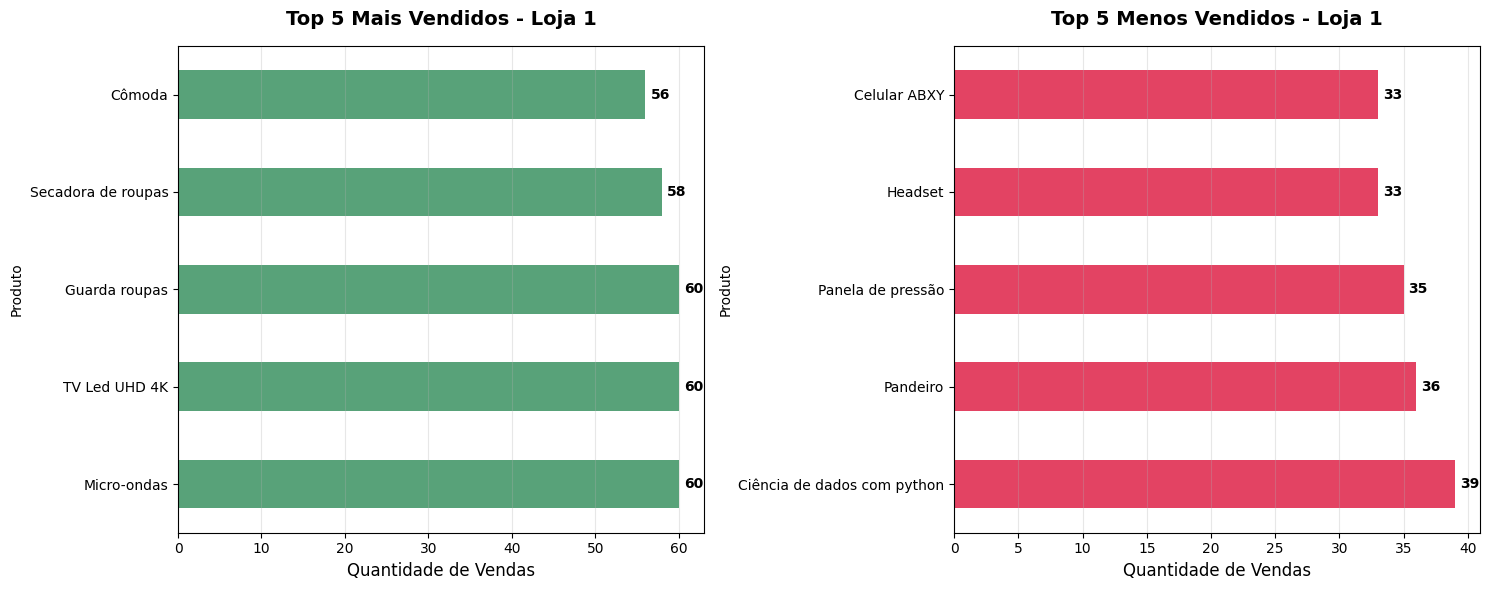

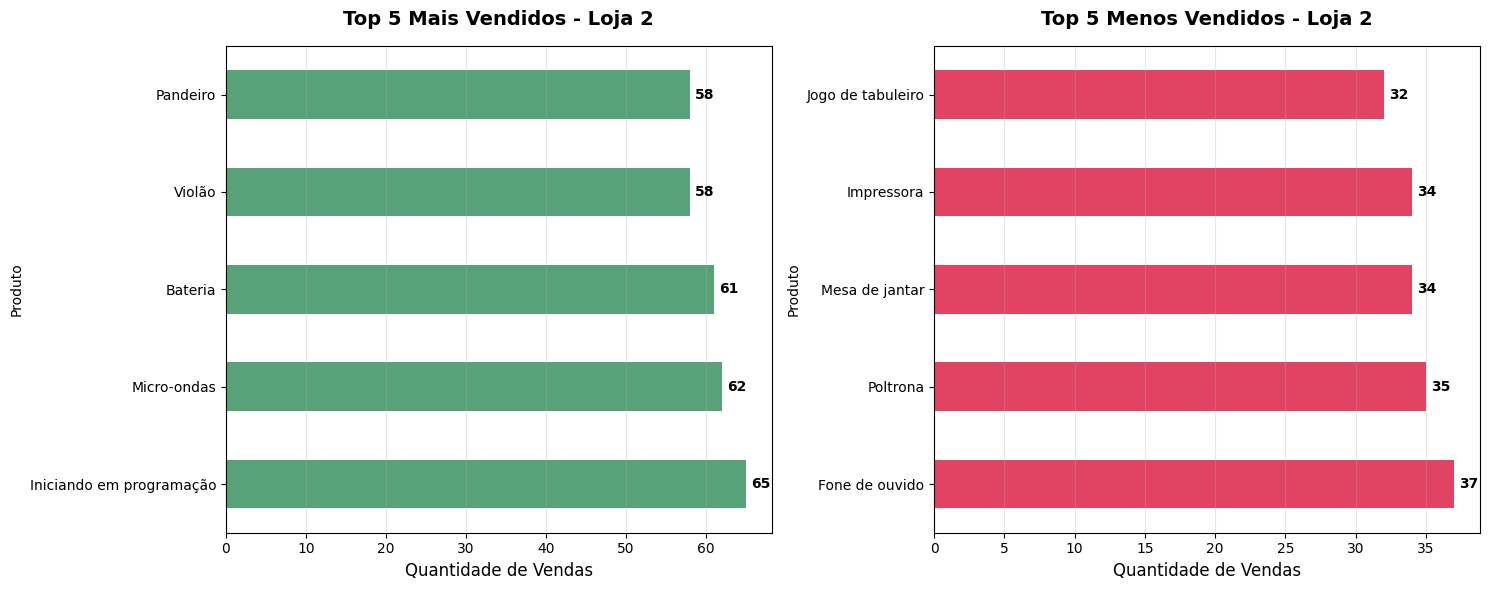

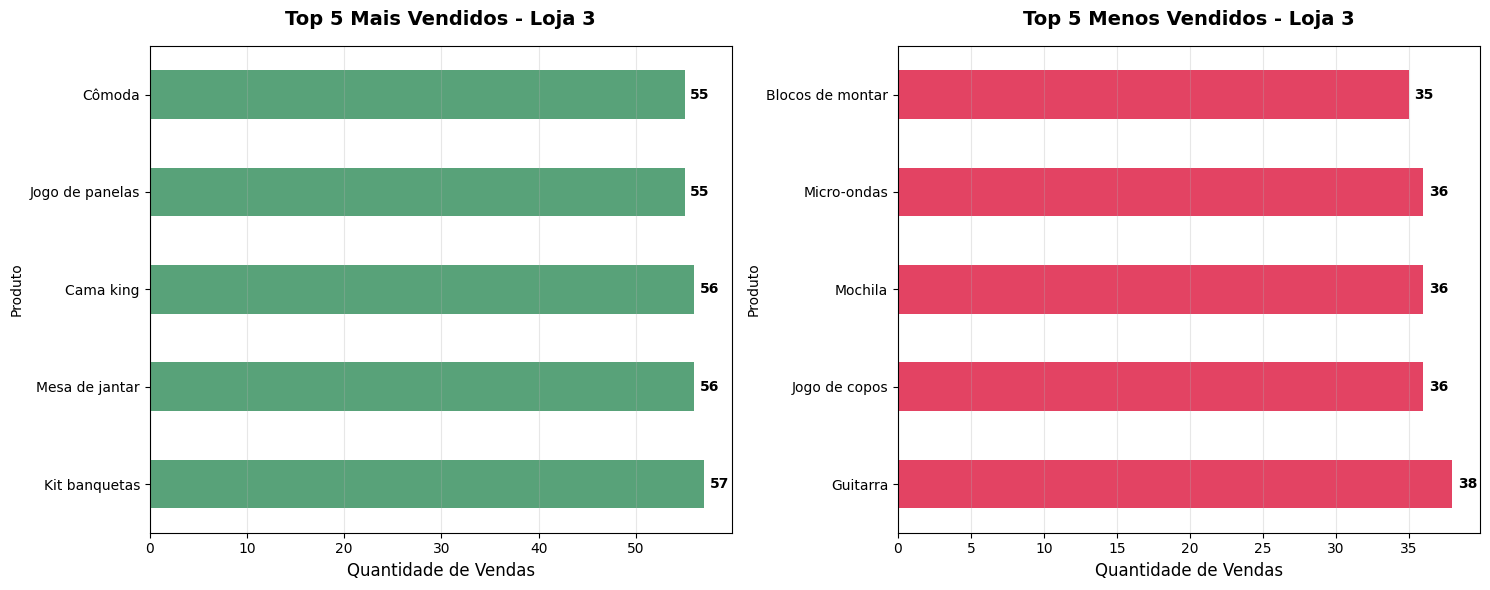

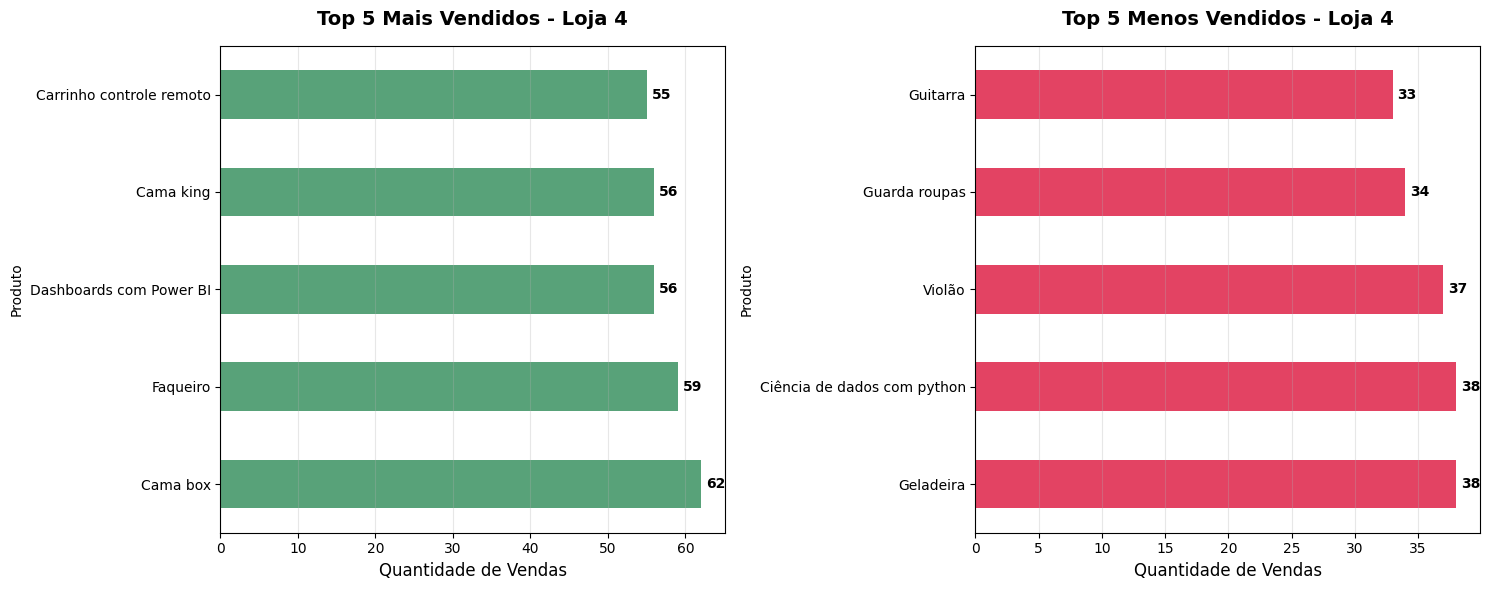

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('default')
sns.set_palette("husl")

def criar_graficos_loja(mais_vendidos, menos_vendidos, loja_num):
    """Função para criar gráficos padronizados para cada loja"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Mais vendidos
    mais_vendidos.plot(kind='barh', ax=ax1, color='#2E8B57', alpha=0.8)
    ax1.set_title(f"Top 5 Mais Vendidos - Loja {loja_num}",
                  fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel("Quantidade de Vendas", fontsize=12)
    ax1.grid(axis='x', alpha=0.3)

    # Adicionar valores nas barras
    for i, v in enumerate(mais_vendidos):
        ax1.text(v + max(mais_vendidos)*0.01, i, str(int(v)),
                va='center', fontsize=10, fontweight='bold')

    # Menos vendidos
    menos_vendidos.plot(kind='barh', ax=ax2, color='#DC143C', alpha=0.8)
    ax2.set_title(f"Top 5 Menos Vendidos - Loja {loja_num}",
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel("Quantidade de Vendas", fontsize=12)
    ax2.grid(axis='x', alpha=0.3)

    # Adicionar valores nas barras
    for i, v in enumerate(menos_vendidos):
        ax2.text(v + max(menos_vendidos)*0.01, i, str(int(v)),
                va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Usar a função para cada loja
criar_graficos_loja(mais_vendidos1, menos_vendidos1, 1)
criar_graficos_loja(mais_vendidos2, menos_vendidos2, 2)
criar_graficos_loja(mais_vendidos3, menos_vendidos3, 3)
criar_graficos_loja(mais_vendidos4, menos_vendidos4, 4)


# 5. Frete Médio por Loja


In [74]:
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f"Frete médio Loja 1: {frete_medio_loja1:.2f}")
print(f"Frete médio Loja 2: {frete_medio_loja2:.2f}")
print(f"Frete médio Loja 3: {frete_medio_loja3:.2f}")
print(f"Frete médio Loja 4: {frete_medio_loja4:.2f}")


Frete médio Loja 1: 34.69
Frete médio Loja 2: 33.62
Frete médio Loja 3: 33.07
Frete médio Loja 4: 31.28


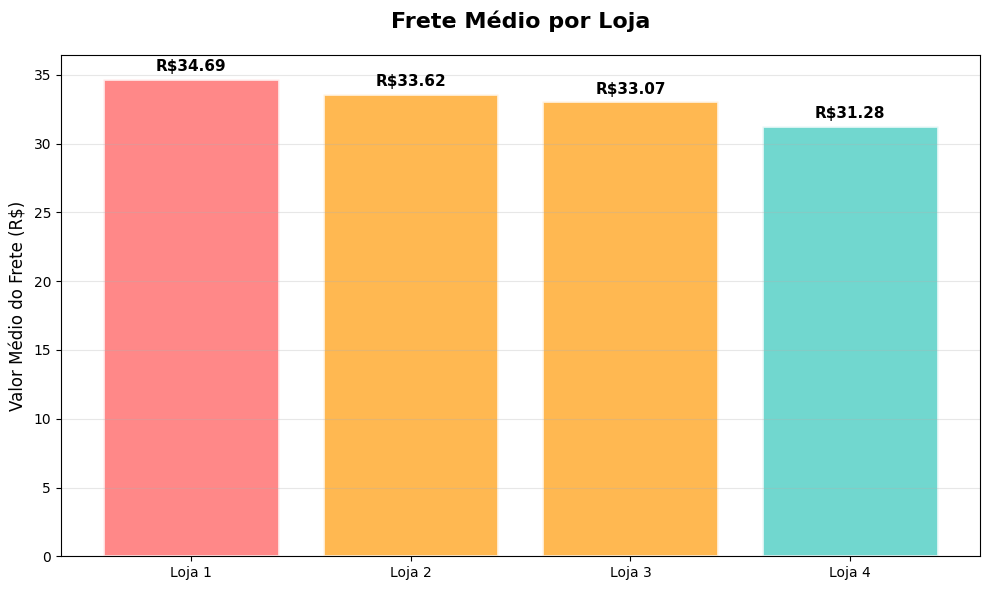

In [75]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

# Destacar a loja com maior/menor frete
cores = ['#FF6B6B' if f == max(fretes) else '#4ECDC4' if f == min(fretes)
         else '#FFA726' for f in fretes]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, fretes, color=cores, alpha=0.8, edgecolor='white', linewidth=2)

plt.title("Frete Médio por Loja", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Valor Médio do Frete (R$)", fontsize=12)

# Valores nas barras
for i, (bar, valor) in enumerate(zip(bars, fretes)):
    plt.text(bar.get_x() + bar.get_width()/2., valor + max(fretes)*0.01,
             f'R${valor:.2f}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Após analisar os indicativos das 4 lojas, cheguei às seguintes conclusões:
A loja 4 possui o menor faturamento dentre todas (R$1.384.497,58)
A loja 4 fica atrás de todas as lojas em faturamento por categoriasd, exceto na categoria "brinquedos", onde ela tem um leve destaque, como demonstrado no gráfico "Faturamento por categorias das lojas"
As avaliações das 4 lojas oscilam muito pouco, sendo a maior a da loja 3 (4.05), e a menor a da loja 1 (4.05), assim sendo, um fator pouco relevante para a decisão da venda
O frete médio das lojas teve uma oscilação um pouco maior, com destaque para a loja 4, que, apesar do menor faturamento, tem o preço médio de frete mais ameno se comparado às outras lojas.
De acordo com esses dados, é possível notar que as lojas 1,2 e 3 operam de maneira muito similar, com faturamento total e faturamamento por categoria muito semelhantes.
A loja 4, porém, tem um faturamento total e faturamento por categoria menores num geral, e seu único ponto positivo perante as outras (frete médio) não aparenta refletir em clientes mais satisfeitos e/ou um faturamento maior em qualquer quesito.
Dito isso, a loja 4 deve ser a Loja que Seu João deve vender, tendo em visto os dados expostos.